In [79]:
# 导入工具包 numpy pandas用于数据处理  
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing
%matplotlib inline

In [80]:
#读取数据
#不用的特征
nouse=['area_id','user_id','prov_id','total_times','sex','is_act_expire','call_days','short_call10','long_call10','bank_cnt']
df = pd.read_csv('train.csv')
df = shuffle(df)
train=df.iloc[:,]
#test=df.iloc[:,]
train=train.dropna()#删除缺失值
train=train.sort_values(by='is_5g',ascending=False)#按照is_5g排序
cut=int(sum(train['is_5g']))
train=train.iloc[:2*cut,:]#选取前2*cut行
#划分特征 与 标签 展现下数据形状
y_train=train['is_5g']
x_train=train.iloc[:,:-1]
x_train=x_train.drop(nouse,axis=1)
#进行数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
x_train01=min_max_scaler.fit_transform(x_train)
x_train= pd.DataFrame(x_train01,columns=x_train.columns)
x_train=x_train.values
y_train=y_train.values
x_train.shape,y_train.shape

((18546, 49), (18546,))

In [81]:
#读取测试集
df=pd.read_csv('test.csv')
df = shuffle(df)
test=df.iloc[:,]
test=test.dropna()
#划分特征 与 标签 展现下数据形状
x_test=test.iloc[:,:]
user=x_test['user_id']
nouse=['user_id','total_times','sex','is_act_expire','call_days','short_call10','long_call10','bank_cnt']
x_test=x_test.drop(nouse,axis=1)
#进行数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
x_test01=min_max_scaler.fit_transform(x_test)
x_test= pd.DataFrame(x_test01,columns=x_test.columns)
x_test=x_test.values
x_test.shape

(300000, 49)

In [82]:
train_data,test_data, train_labels=x_train,x_test,y_train

In [83]:
#使用adaboost分类算法
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(train_data,train_labels)
predict_target2=model.predict(test_data)

In [73]:
#神经网络分类方法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_data,train_labels)
predict_target2=model.predict(test_data)

E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [76]:
#logistic回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,l1_ratio=0.01)
model.fit(train_data,train_labels)
predict_target2=model.predict(test_data)

E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:1506: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [70]:
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_data,train_labels)
predict_target2=model.predict(test_data)

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier(random_state=123)
model.fit(train_data,train_labels)
predict_target2=model.predict(test_data)

In [88]:
res=pd.concat([pd.DataFrame(user.values,columns=['user_id']),pd.DataFrame(predict_target2,columns=['is_5g'])],axis=1)
res.to_csv('result.csv',index=False)

In [89]:
#输出结果 sample 根据userid索引
import pandas as pd
df1 =pd.DataFrame(pd.read_csv('sample.csv'))
df1=df1.drop('is_5g', axis=1)
df2 =pd.DataFrame(pd.read_csv('result.csv'))
result = pd.merge(df1,df2.loc[:,['user_id','is_5g']],how='left',on = 'user_id')
result.to_csv('sample_result.csv',index=False)

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\anoconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


训练集:
预测正确数量,训练集样本量:
7888 10734
精确度等指标：
              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69      5367
         1.0       0.68      0.87      0.77      5367

    accuracy                           0.73     10734
   macro avg       0.75      0.73      0.73     10734
weighted avg       0.75      0.73      0.73     10734

混淆矩阵：
[[3210 2157]
 [ 689 4678]]
测试集:
预测正确数量,测试集样本量:
174618 300000
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.58      0.73    296094
         1.0       0.03      0.85      0.05      3906

    accuracy                           0.58    300000
   macro avg       0.51      0.71      0.39    300000
weighted avg       0.98      0.58      0.72    300000

混淆矩阵：
[[171308 124786]
 [   596   3310]]
在训练集上的预测效果:


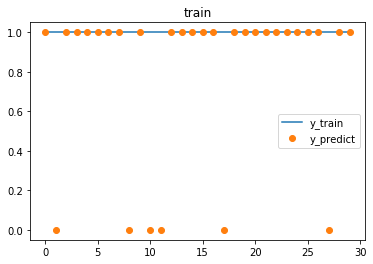

在测试集上的预测效果:


E:\anoconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


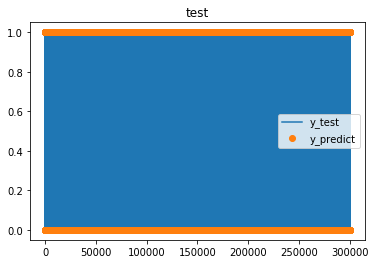

In [84]:
#用上面三种效果最好的算法集成 得到的投票分类算法
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf2 = MLPClassifier()
clf3 = LogisticRegression(random_state=0,)
model = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')#hard
model.fit(train_data,train_labels)
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))
